# CH 11

## Exer 01

阅读并且运行 chap11.ipynb 上面的代码示例，听一听示例中的音频。

In [67]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [68]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate
from thinkdsp import read_wave

## Exer 03

引入鼓聲訊號

In [69]:
if not os.path.exists('263868__kevcio__amen-break-a-160-bpm.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/263868__kevcio__amen-break-a-160-bpm.wav

In [70]:
wave = read_wave('263868__kevcio__amen-break-a-160-bpm.wav')
print(wave.framerate)
wave.normalize()
wave.make_audio()

44100


對鼓聲做低通濾波，freq=10000

In [71]:
spectrum_filiter = wave.make_spectrum()
spectrum_filiter.low_pass(10000)
wave_filiter = spectrum_filiter.make_wave()
wave_filiter.make_audio()

In [72]:
from thinkdsp import Wave

def sample(wave, factor):
    """Simulates sampling of a wave.
    
    wave: Wave object
    factor: ratio of the new framerate to the original
    """
    ys = np.zeros(len(wave))
    ys[::factor] = wave.ys[::factor]
    return Wave(ys, framerate=wave.framerate) 

接著進行取樣，取樣率=原來的一半，44100/2=22050。並且取樣完再做高低通率波，把過高頻和過低頻訊號去掉。

In [73]:
wave1 = sample(wave_filiter,2)

spectrum1 = wave1.make_spectrum(full=True)
spectrum1.low_pass(10000)
spectrum1.high_pass(-10000)
wave1 = spectrum1.make_wave()

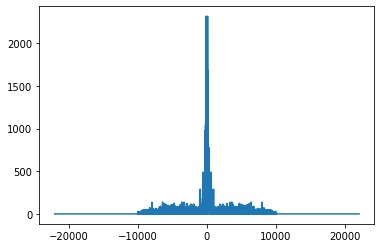

In [74]:
wave1.make_spectrum(full=True).plot()
wave1.make_audio()

產生的訊號成果很漂亮。

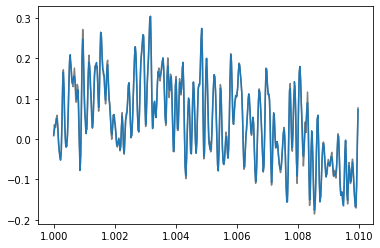

In [76]:
def plot_segments(original, filtered):
    start = 1
    duration = 0.01
    original.segment(start=start, duration=duration).plot(color='gray')
    filtered.segment(start=start, duration=duration).plot()

plot_segments(wave,wave_filiter)

取樣+濾波的結果 與 filter的結果完全一樣。說明只要事先做好取樣率/2的低通濾波，在進行取樣，就不會產生雜訊干擾。